# Histogram bins 

A histogram is a graphical representation of a data distribution.
I like to think of histogram bins as boxes. Each box represents a range. Every datapoint will fall into a box depending on its value. For example, the first box could represent values that range from 0 to 10, everytime a datapoint falls into this range we'll add it to the first box so we'll now that the first box contains 1 value. As we keep adding values to the boxes the heights of each box will grow according to the numbers of values it contains.

Let's visualize a dataset plotted on a histogram with 10 bins.

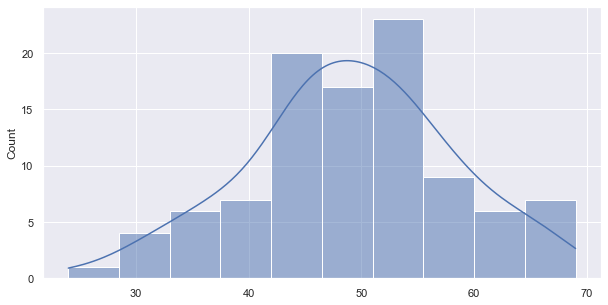

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
np.random.seed(42)

dataset = np.random.normal(loc=50, scale=10, size=100).round(0)
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(dataset, ax=ax, kde=True, bins=10);

We can change the number os bins for the same dataset

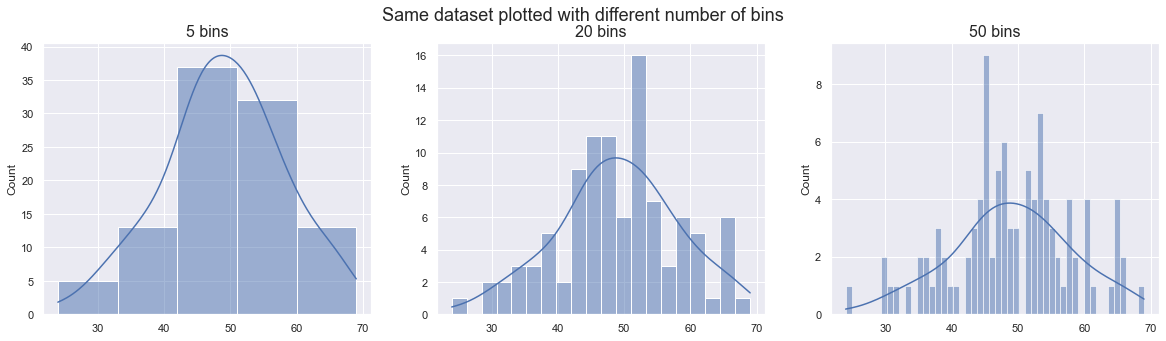

In [42]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))
fig.suptitle('Same dataset plotted with different number of bins', fontsize=18)
sns.histplot(dataset, ax=ax1, kde=True, bins=5);
ax1.set_title('5 bins', fontsize=16);
sns.histplot(dataset, ax=ax2, kde=True, bins=20);
ax2.set_title('20 bins', fontsize=16);
sns.histplot(dataset, ax=ax3, kde=True, bins=50);
ax3.set_title('50 bins', fontsize=16);

You can see that depending on the numbers of bins we choose we can have a different visualization that potentially can lead us to different conclusions about our data. So, how do we choose the correct numbers of bins for a histogram?

## How many bins?

There are different ways we can calculate the number of ideal bins for a histogram. You can check a good summary [here](https://en.wikipedia.org/w/index.php?title=Histogram&action=edit) of different formulas that make assumptions depending on how the data is distributed.

$$ k = \left \lceil \frac{\max x - \min x}{h} \right \rceil $$

where:

- $ k $ is the number of bins we're looking for
- $ x $ is the dataset we're working with
- $ n $ is the number of datapoints


### Sturges formula

It assumes an approximate normal distribution and allows us to calculate the numbers of bins directly without the need for the bin width. It depends only on the number of datapoints.

$$ k = \lceil \log_2 n \rceil+ 1  \, $$

### Freedman-Diaconis

It helps us to calculate the width of the bin that we can use to calculate the adequate number of bins shown in the first formula above. It needs the IQR, i. e., it depends on the spread of the data. It takes into account data variability and data size.

$$ h =  2\frac{\operatorname{IQR}(x)}{\sqrt[3]{n}} $$



## 🐍 Python

The ideal number of bins for the given dataset is: 11


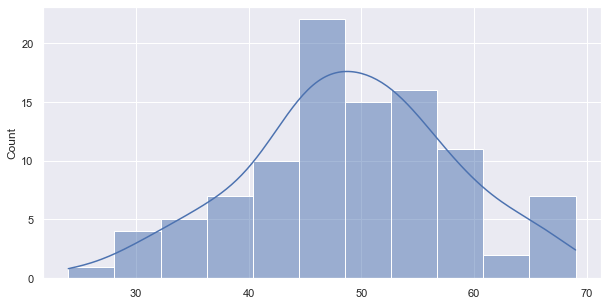

In [80]:
np.random.seed(42)

# Using the Freedman-Diaconis formula to calculate the width of a bin
iqr = np.quantile(dataset, .75) - np.quantile(dataset, .25)
h = (2 * iqr) / np.cbrt(dataset.size)

# Using the bin width to calculate the number of bins
k = int(np.ceil(np.ceil(max(dataset) - min(dataset)) / h))
print(f"The ideal number of bins for the given dataset is: {k}")

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(dataset, ax=ax, kde=True, bins=k);

## 📚 Libraries

In [81]:
np.random.seed(42)

# Numpy will give us the edges of each bin and we can choose which function we want to use. 
# Here fd stands for Freedman-Diaconis.
# More info: https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges
k = np.histogram_bin_edges(dataset, bins="fd")

print(f"The ideal number of bins for the given dataset is: {k.size - 1}")

The ideal number of bins for the given dataset is: 11


Wanna hear some good news? Seaborn's histplot function will pass the dataset to Numpy's `histogram_bin_edges` function just used above and the default function used by Numpy is: `Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance.` so it means that we don't need to calculate the numbers os bins if we're fine with using Freedman-Diaconis because it will be used as the default formula.

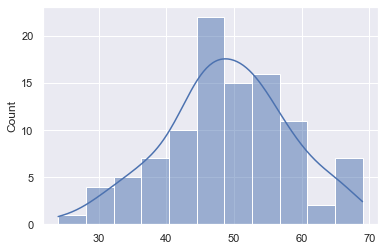

In [76]:
sns.histplot(dataset, kde=True);

![](https://media.giphy.com/media/uTuLngvL9p0Xe/giphy.gif)

Even though the default behaviour is enough for this dataset it's important to understand different formulas because they make assumptions about different data distributions.

## 📒 Notebook
The link for the notebook can be found [here](https://github.com/nathanqueija/statistics/blob/master/1_descriptive_statistics/9_histogram_bins.ipynb)